# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [135]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
marsTable = soup.select('tr')
print(marsTable)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
marsTableList = []
# Loop through the scraped data to create a list of rows
for row in marsTable:
    rowList = [text for text in row.stripped_strings]
    marsTableList.append(rowList)

marsTableList
headers = marsTableList.pop(0)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
marsData = pd.DataFrame(marsTableList, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
marsData.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
marsData.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
marsData = marsData.astype({'terrestrial_date': 'datetime64[ns]', 'sol': 'int64', 'ls': 'int64', 'month': 'int64', 'min_temp': 'float64', 'pressure': 'float64'})


In [11]:
# Confirm type changes were successful by examining data types again
marsData.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
marsData["month"].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

There are 12 months on Mars.

In [13]:
# 2. How many Martian days' worth of data are there?
marsData["sol"].count()

1867

There are 1867 martian days worth of data.

In [14]:
# 3. What is the average low temperature by month?
marsMinMonth = marsData.groupby('month')['min_temp'].mean()
marsMinMonth

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

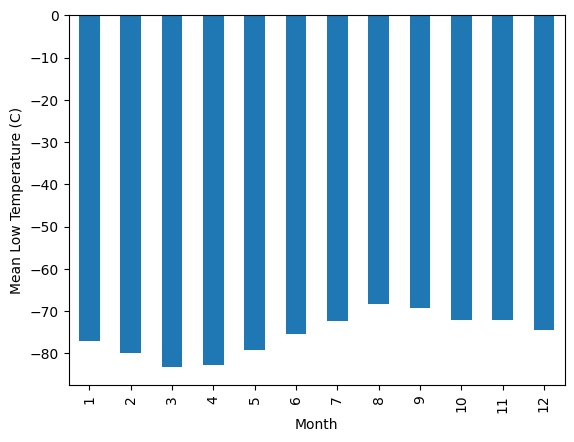

In [15]:
# Plot the average temperature by month
marsMinBar = marsMinMonth.plot.bar(xlabel='Month', ylabel='Mean Low Temperature (C)')

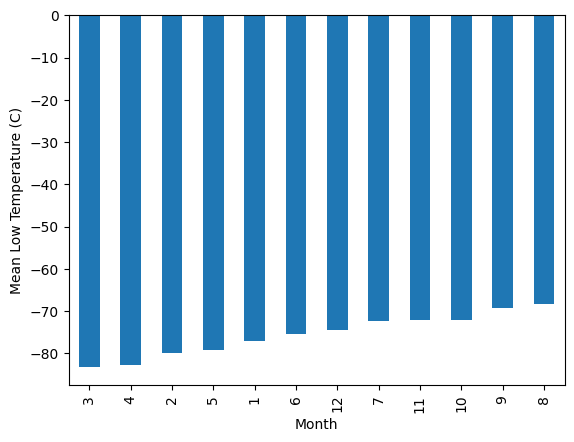

In [16]:
# Identify the coldest and hottest months in Curiosity's location
marsMinMonthSort = marsMinMonth.sort_values()
marsMinSortbar = marsMinMonthSort.plot.bar(xlabel='Month', ylabel='Mean Low Temperature (C)')

Using the recorded low of each Martian day, the 3rd month has the lowest mean temperature. The 8th month has the highest average temperature.

In [17]:
# 4. Average pressure by Martian month
marsAvgP = marsData.groupby('month')['pressure'].mean().sort_values()
marsAvgP

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

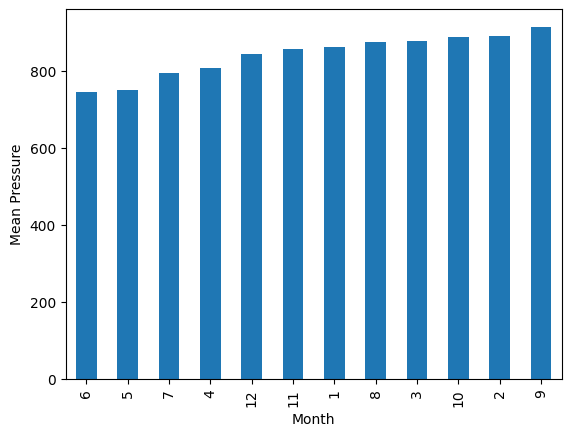

In [18]:
# Plot the average pressure by month
marsAvgPBar = marsAvgP.plot.bar(xlabel='Month', ylabel='Mean Pressure')

The 6th month has the lowest mean pressure. The 9th month has the highest mean pressure.

In [100]:
# Create df of all days between the first and last recorded terrestial dates
# Merge in min temp data to give all days a min_temp or NaN value
marsDays = pd.DataFrame({'terrestrial_date': pd.date_range(marsData['terrestrial_date'].min(), marsData['terrestrial_date'].max())})
marsMinDay = marsDays.merge(marsData[['terrestrial_date', 'min_temp']], how='left', on='terrestrial_date')
marsMinDay.drop(columns='terrestrial_date', inplace=True)
marsMinDay.head()

,min_temp
0,-75.0
1,-76.0
2,-76.0
3,-74.0
4,-74.0


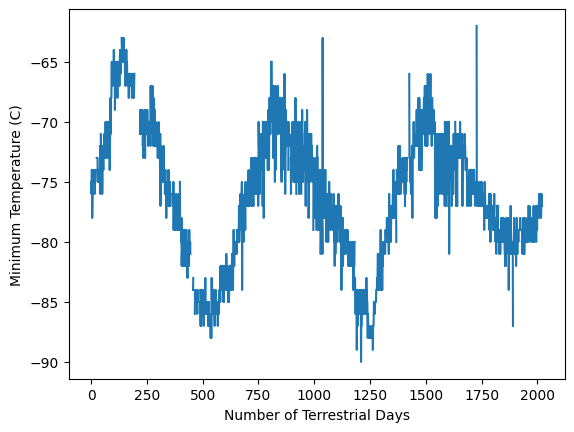

In [102]:
# 5. How many terrestrial (earth) days are there in a Martian year?
marsMinDayPlot = marsMinDay.plot(legend=False, xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature (C)')

In [128]:
# Using the graph as a guide, find the warmest day each year (excluding outliers)
print(marsMinDay.iloc[0:250].sort_values('min_temp', ascending=False).head(3))
print(marsMinDay.iloc[750:1000].sort_values('min_temp', ascending=False).head(3))
print(marsMinDay.iloc[1450:1600].sort_values('min_temp', ascending=False).head(3))

     min_temp
146     -63.0
137     -63.0
138     -64.0
     min_temp
807     -65.0
809     -65.0
867     -66.0
      min_temp
1521     -66.0
1509     -66.0
1496     -67.0


In [130]:
# Using the graph as a guide, find the coldest day each year (excluding outliers)
print(marsMinDay.iloc[500:600].sort_values('min_temp').head(3))
print(marsMinDay.iloc[1000:1250].sort_values('min_temp').head(3))
print(marsMinDay.iloc[1750:2000].sort_values('min_temp').head(3))

     min_temp
539     -88.0
536     -88.0
534     -87.0
      min_temp
1210     -90.0
1191     -89.0
1247     -88.0
      min_temp
1891     -87.0
1872     -84.0
1859     -82.0


In [137]:
# Take the average of the distances between the coldest days and warmest days each year
print(((1509-807) + (807-146) + (1891-1210) + (1210-536))/4)

679.5


The average distance between the coldest and warmest day each year is 679.5 earth days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [109]:
# Write the data to a CSV
marsData.to_csv('marsData.csv')

In [138]:
browser.quit()